# Social Distance Data
* Provided by Maryland Transportation Institute and Center for Advanced Transportation Technology Laboratory at the University of Maryland
* Access through this link: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv

In [ ]:
!pip3 install sodapy
!pip3 install glob3
!pip install tqdm

  Created wheel for glob3: filename=glob3-0.0.1-py3-none-any.whl size=1677 sha256=cc938adf9635f396d5966e57cf2e48a273c6b7905b0a157796ea5523aa38bd6d
  Stored in directory: /home/jovyan/.cache/pip/wheels/e5/f8/94/7dbf119182513c275e6b2ea761983692f23f8be8c22909b73d
Successfully built glob3
     |████████████████████████████████| 70 kB 10.0 MB/s 


In [ ]:
from sodapy import Socrata
from glob import glob

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from tqdm import tqdm

import datetime

import matplotlib.pyplot as plt
from matplotlib import dates
import plotly
import plotly.figure_factory as ff

In [ ]:
# create or pass in the folder path that stores the data files
data_folder_path = '../data/distance_data/'

client = Socrata("data.bts.gov", 'CgejIICiuJS7QETgHZiYeE04C')

def get_all_data(start = 0, end = 2139980, step = 50000):
    """This function downloads the whole data in 43 separate files"""
    print('Percentage downloaded:')
    for i in range((end - start)//step+1):
        offset = i*step
        print(round(offset/end,3),end=',')
        one_part_df = pd.DataFrame.from_records(client.get("w96p-f2qv", limit = step, offset = offset))
        one_part_df.to_csv(data_folder_path+'data_'+str(offset).zfill(7)+'.csv',index=False)

get_all_data()


In [ ]:

data_folder_path = '../data/distance_data/'

def aggregate_data_files(data_folder_path = data_folder_path):
    """This function combines the 43 data files and returns a single dataframe"""
    df = pd.DataFrame()
    paths = sorted(glob(data_folder_path+'data_*'))
    for i in range(len(paths)):
        if i%5 == 0:
            print(round(i/len(paths),3),end=', ')
        df = df.append(pd.read_csv(paths[i]),ignore_index=True)
    return df

df = aggregate_data_files()

0.0, 0.116, 0.233, 0.349, 0.465, 0.581, 0.698, 0.814, 0.93, 

In [ ]:
print(df.columns)
print(df.shape)

Index(['level', 'date', 'state_fips', 'state_code', 'county_fips', 'county',
       'pop_stay_at_home', 'pop_not_stay_at_home', 'trips', 'trips_1',
       'trips_1_3', 'trips_3_5', 'trips_5_10', 'trips_10_25', 'trips_25_50',
       'trips_50_100', 'trips_100_250', 'trips_250_500', 'trips_500'],
      dtype='object')
(2139980, 19)


In [ ]:
df.head(1)

,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
0,County,2019-01-01T00:00:00.000,29.0,MO,29171.0,Putnam County,1155.0,3587.0,12429.0,2807.0,3642.0,1272.0,1240.0,1953.0,1058.0,283.0,101.0,54.0,19.0


In [ ]:
df["only_date"] = df["date"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f').strftime('%m/%d'))
df["weekday"] = pd.to_datetime(df["date"]).dt.weekday

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.describe()

,state_fips,county_fips,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,weekday
count,2.139310e+06,2.105140e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.116999e+06,2.139980e+06
mean,3.025900e+01,3.038365e+04,6.672673e+04,2.433713e+05,1.137762e+06,2.781450e+05,2.855977e+05,1.394339e+05,1.763099e+05,1.739500e+05,5.605488e+04,1.778518e+04,7.276928e+03,1.675331e+03,1.532984e+03,3.000000e+00
std,1.515153e+01,1.516010e+04,1.294350e+06,4.666669e+06,2.213485e+07,5.402619e+06,5.566518e+06,2.718459e+06,3.445148e+06,3.410082e+06,1.088177e+06,3.428892e+05,1.426783e+05,3.300456e+04,3.422339e+04,1.996266e+00
min,1.000000e+00,1.001000e+03,8.000000e+00,-3.800000e+01,2.200000e+02,0.000000e+00,0.000000e+00,-1.080000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,1.817700e+04,2.137000e+03,9.297000e+03,4.265550e+04,9.070000e+03,9.600000e+03,4.054000e+03,5.557000e+03,6.785000e+03,3.355000e+03,1.168000e+03,3.710000e+02,5.600000e+01,1.800000e+01,1.000000e+00
50%,2.900000e+01,2.917600e+04,5.052000e+03,2.185700e+04,1.025670e+05,2.211300e+04,2.545900e+04,1.166200e+04,1.436000e+04,1.622600e+04,7.240000e+03,2.574000e+03,8.750000e+02,1.670000e+02,6.800000e+01,3.000000e+00
75%,4.500000e+01,4.508100e+04,1.485000e+04,5.959600e+04,2.825795e+05,6.238650e+04,7.335950e+04,3.520400e+04,4.195150e+04,4.305100e+04,1.716200e+04,5.959000e+03,2.232000e+03,4.720000e+02,2.590000e+02,5.000000e+00
max,5.600000e+01,5.604500e+04,1.102118e+08,2.737400e+08,1.569053e+09,4.227002e+08,4.051305e+08,1.980184e+08,2.526118e+08,2.565096e+08,7.636732e+07,2.553974e+07,1.447698e+07,3.651375e+06,5.003062e+06,6.000000e+00


In [ ]:
start_date1 = datetime.datetime(2019,1,1)
end_date1 = datetime.datetime(2019,10,31)
df_2019 = df[df['date'] >= start_date1]
df_2019 = df_2019[df_2019["date"] <= end_date1]

start_date2 = datetime.datetime(2020,1,1)
df_2020 = df[df['date'] >= start_date2]

In [ ]:
national_2019 = df_2019[df_2019["level"] == "National"].reset_index(drop = True)
state_2019 = df_2019[df_2019["level"] == "State"].reset_index(drop = True)
county_2019 = df_2019[df_2019["level"] == "County"].reset_index(drop = True)

national_2020 = df_2020[df_2020["level"] == "National"].reset_index(drop = True)
state_2020 = df_2020[df_2020["level"] == "State"].reset_index(drop = True)
county_2020 = df_2020[df_2020["level"] == "County"].reset_index(drop = True)

In [ ]:
state_names = state_2020["state_code"].unique()
print(len(state_names))

51


In [ ]:
data_all = [[national_2019, state_2019, county_2019],
            [national_2020, state_2020, county_2020]]

In [ ]:
# save cleaned data
data_folder_path = '../data/distance_data/'
data_names = ["national_2019", "state_2019", "county_2019",
             "national_2020", "state_2020", "county_2020"]
i = 0
for year in data_all:
    for data in year:
        data['pop'] = data['pop_stay_at_home'] + data['pop_not_stay_at_home']
        data['avg_stay_at_home_ratio'] = data['pop_stay_at_home']/data['pop']
        if (i == 0) or (i == 3):
            data['MA_7'] = data['avg_stay_at_home_ratio'].transform(lambda x: x.rolling(7, 1).mean())

        elif (i == 1) or (i == 4):
            # state level
            data['MA_7'] = data.groupby("state_code")['avg_stay_at_home_ratio'].transform(lambda x: x.rolling(7, 1).mean())
        else:
            # county level
            data['MA_7'] = data.groupby("county_fips")['avg_stay_at_home_ratio'].transform(lambda x: x.rolling(7, 1).mean())

        data.to_csv(data_folder_path+"%s.csv"%(data_names[i]), index = False)
        i += 1

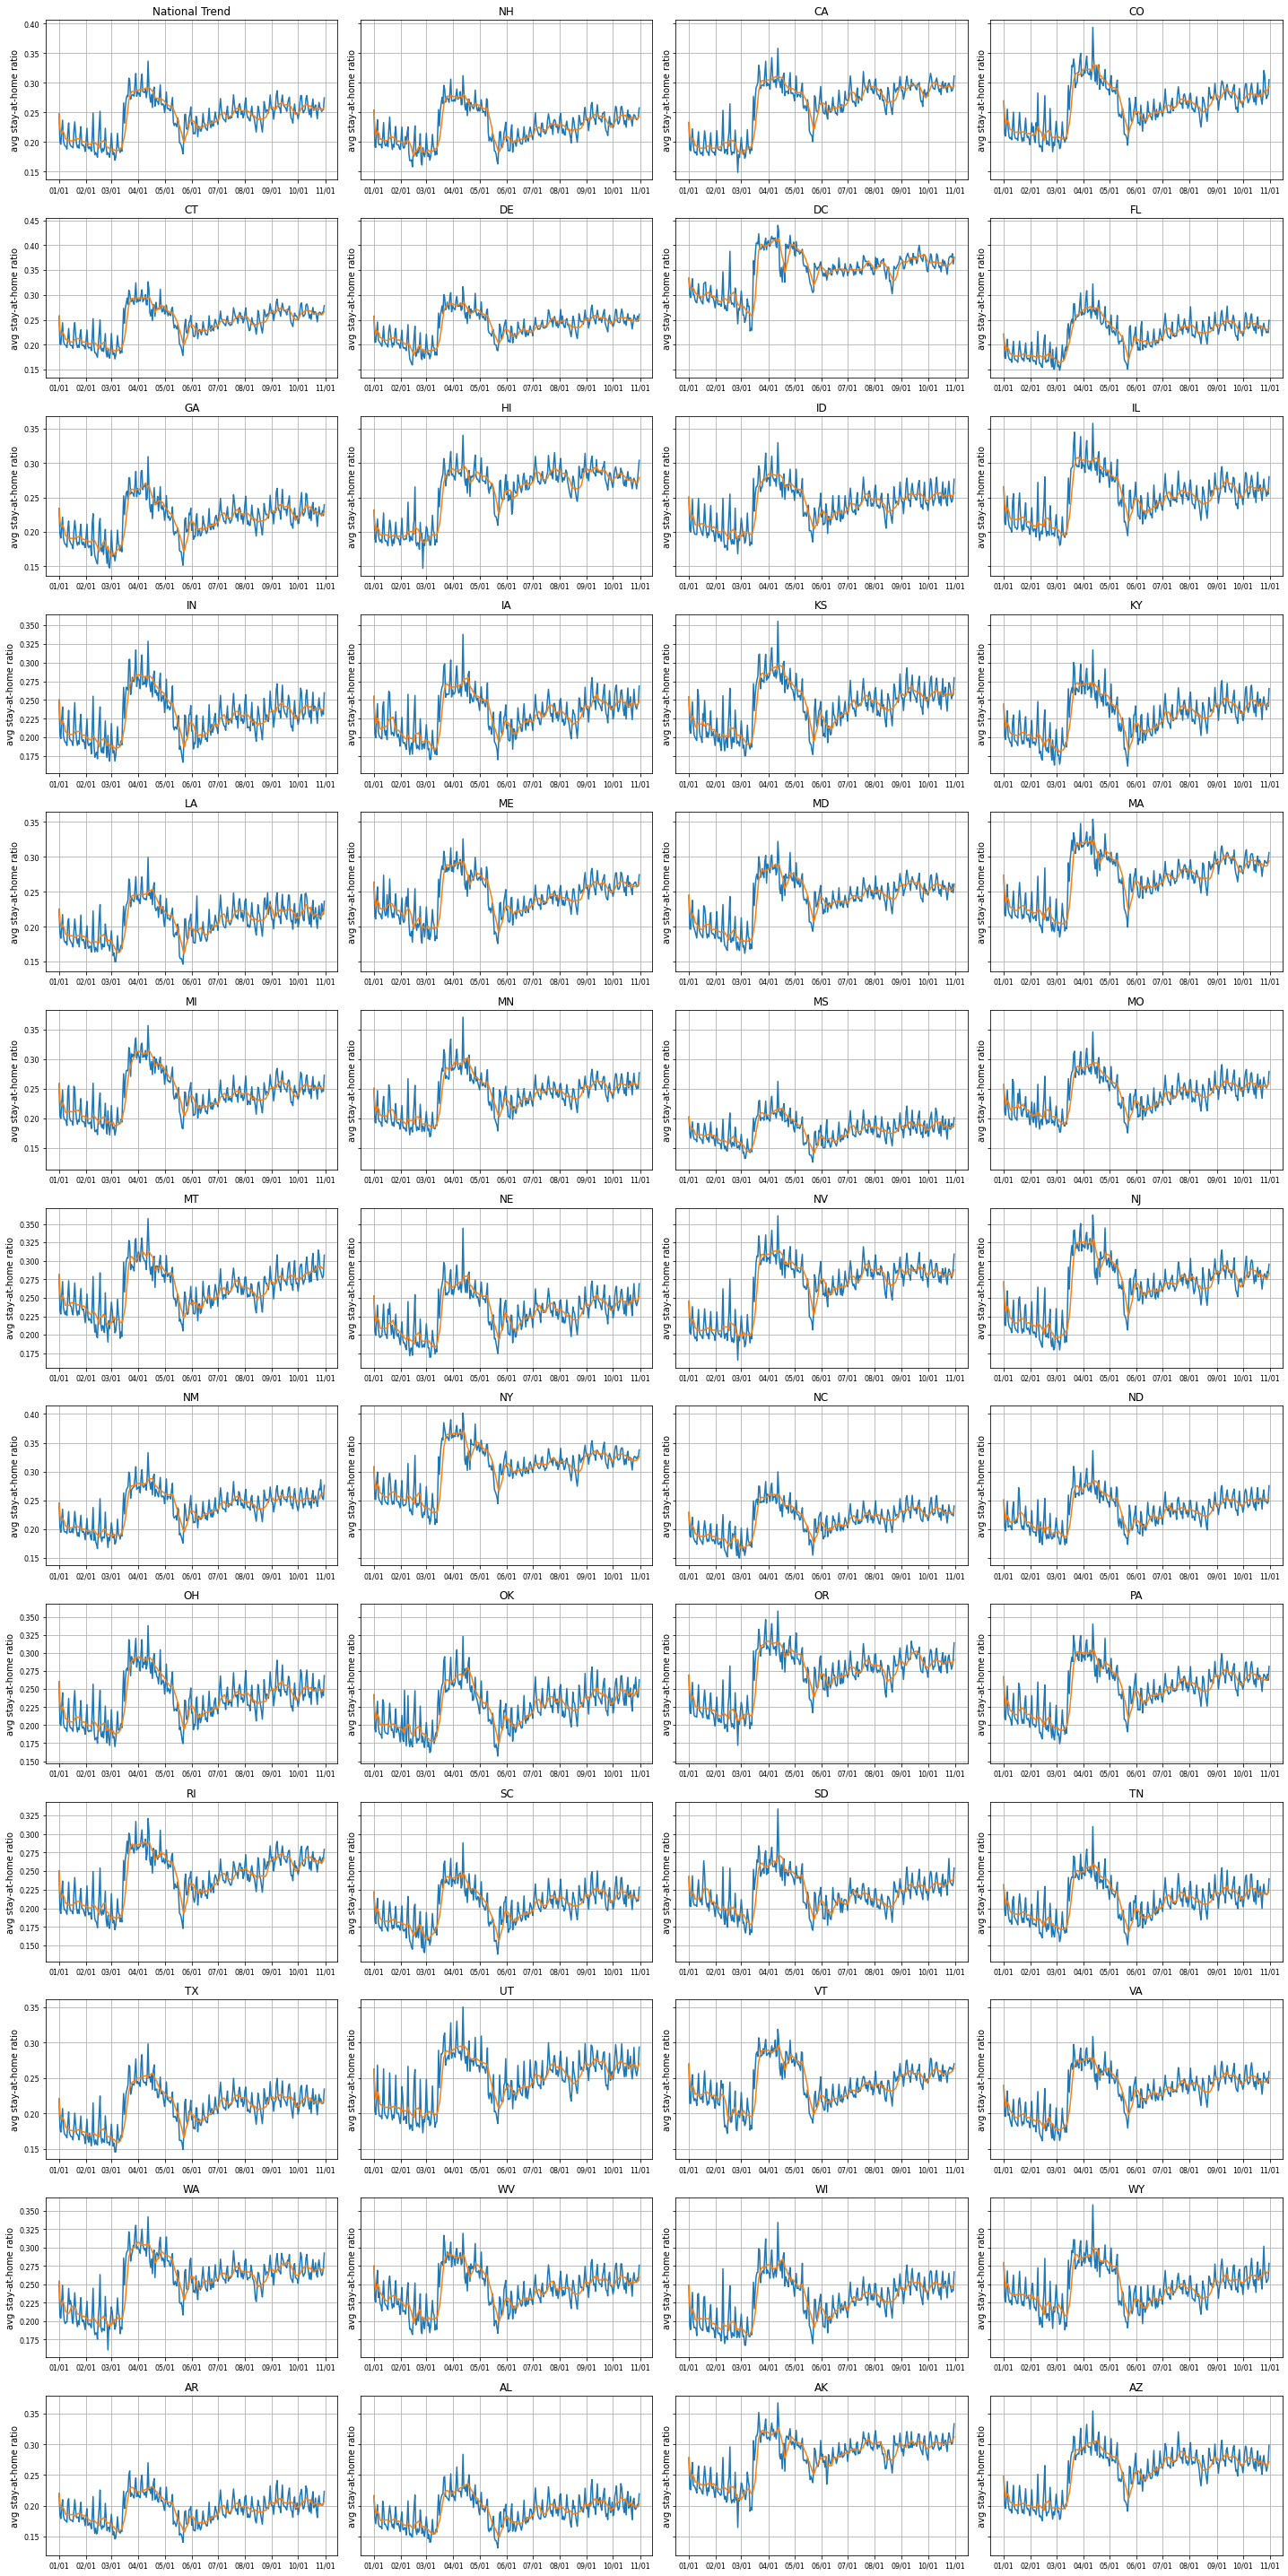